<a href="https://colab.research.google.com/github/Prabin712/2501928_PrabinKunwar_Assignment-I/blob/main/2501928_PrabinKunwar_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
df = pd.read_csv("/content/drive/My Drive/Final-Assignement_Concept and technology of ai/health_data.csv")

In [64]:
df.head()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0.0,18393.0,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0
1,1,1.0,20228.0,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1
2,2,2.0,18857.0,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1
3,3,3.0,17623.0,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1
4,4,4.0,17474.0,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0


In [65]:
df.tail()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,69995,99993.0,19240.0,1,168.0,76.0,120.0,80.0,0,0,1,0,1,0
69996,69996,99995.0,22601.0,0,158.0,126.0,140.0,90.0,1,1,0,0,1,1
69997,69997,99996.0,19066.0,1,183.0,105.0,180.0,90.0,2,0,0,1,0,1
69998,69998,99998.0,22431.0,0,163.0,72.0,135.0,80.0,0,1,0,0,0,1
69999,69999,99999.0,20540.0,0,170.0,72.0,120.0,80.0,1,0,0,0,1,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   70000 non-null  int64  
 1   id           70000 non-null  float64
 2   age          70000 non-null  float64
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  float64
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  float64
 7   ap_lo        70000 non-null  float64
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 7.5 MB


In [67]:
df.shape

(70000, 14)

In [68]:
df.describe()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,34999.500000,49972.419900,19468.865814,0.349571,164.359229,74.205690,128.817286,96.630414,0.366871,0.226457,0.088129,0.053771,0.803729,0.499700
std,20207.403759,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,0.000000,10798.000000,0.000000,55.000000,10.000000,-150.000000,-70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17499.750000,25006.750000,17664.000000,0.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,34999.500000,50001.500000,19703.000000,0.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,52499.250000,74889.250000,21327.000000,1.000000,170.000000,82.000000,140.000000,90.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,69999.000000,99999.000000,23713.000000,1.000000,250.000000,200.000000,16020.000000,11000.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
df = df.drop(columns=['Unnamed: 0', 'id'])

In [70]:
df['age'] = df['age'] / 365

In [71]:
df.isnull().sum()

,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0
alco,0


In [72]:
df.duplicated().sum()

np.int64(24)

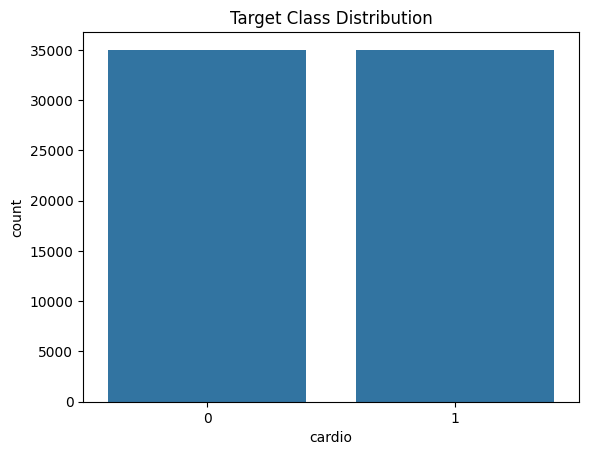

In [73]:
sns.countplot(x='cardio', data=df)
plt.title("Target Class Distribution")
plt.show()

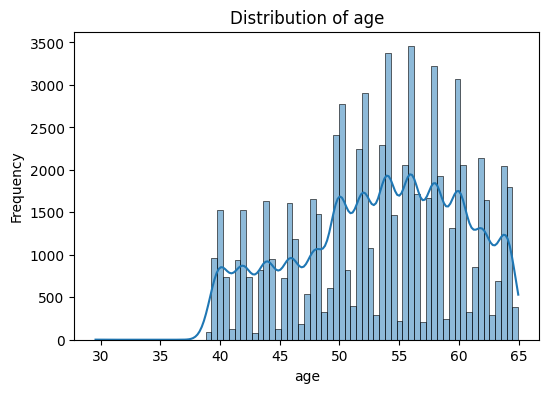

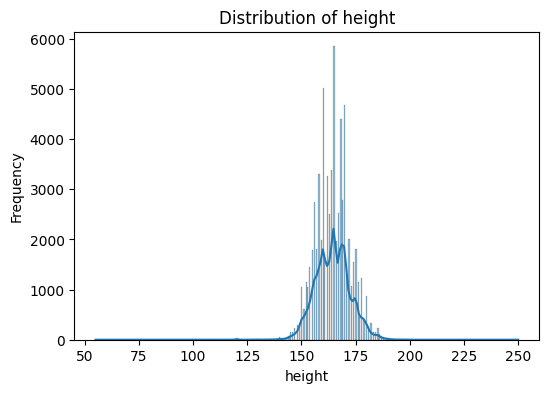

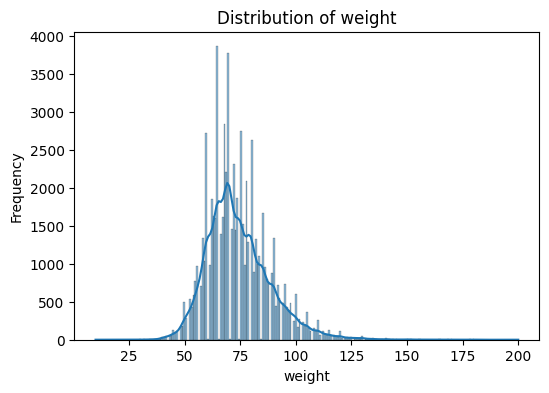

In [74]:
num_cols = [
    'age',
    'height',
    'weight',

]

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


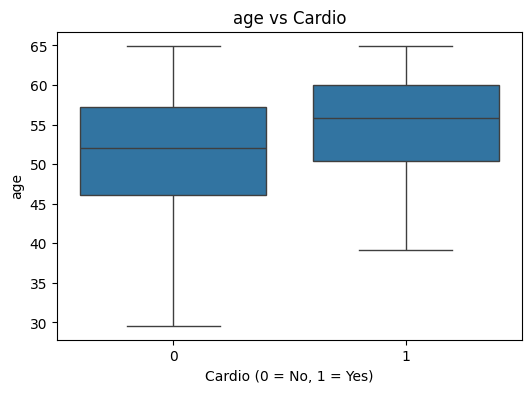

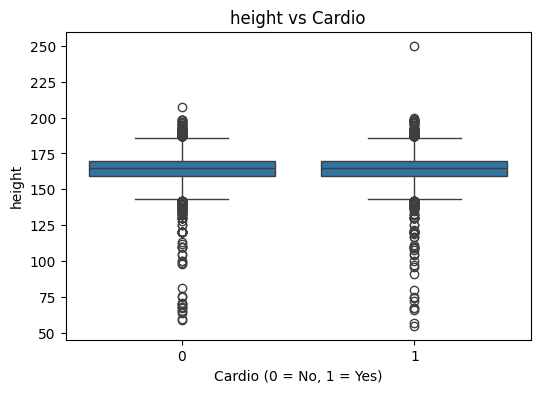

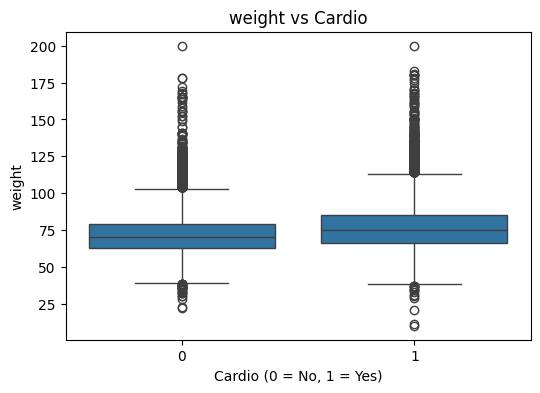

In [75]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='cardio', y=col, data=df)
    plt.title(f"{col} vs Cardio")
    plt.xlabel("Cardio (0 = No, 1 = Yes)")
    plt.ylabel(col)
    plt.show()


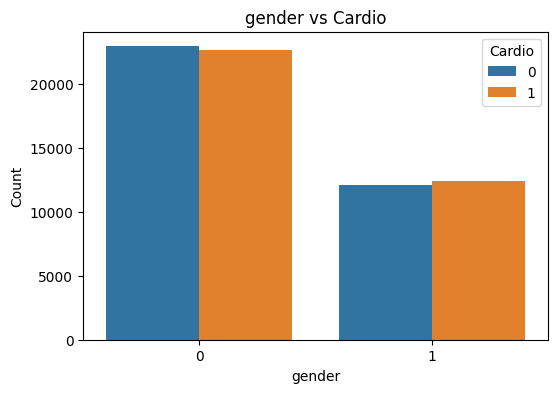

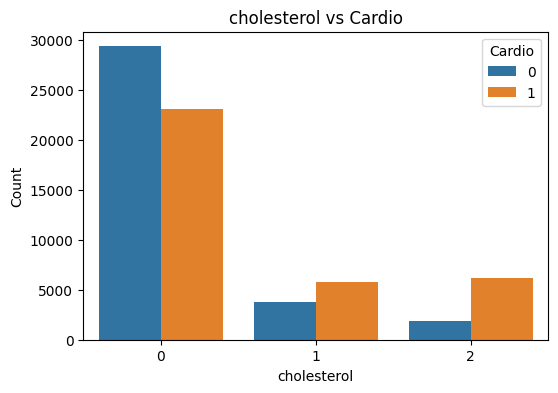

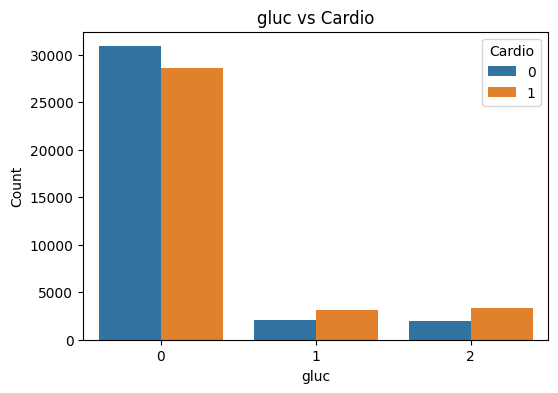

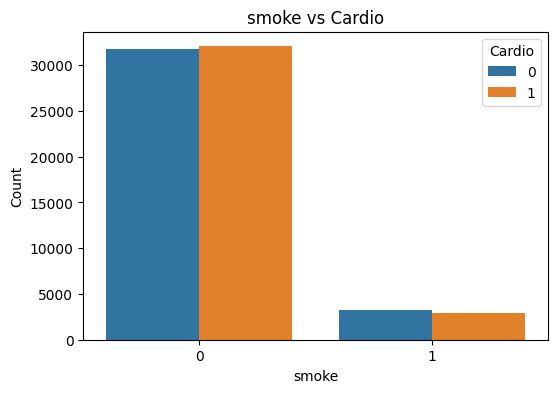

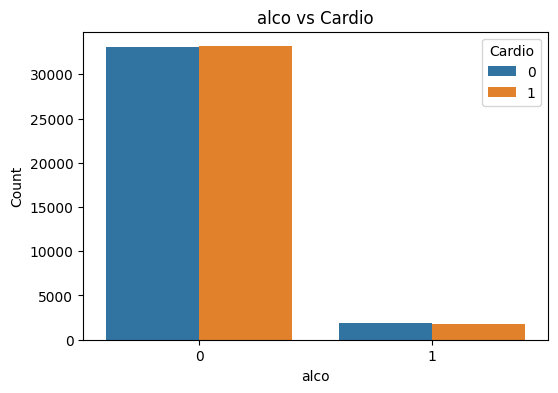

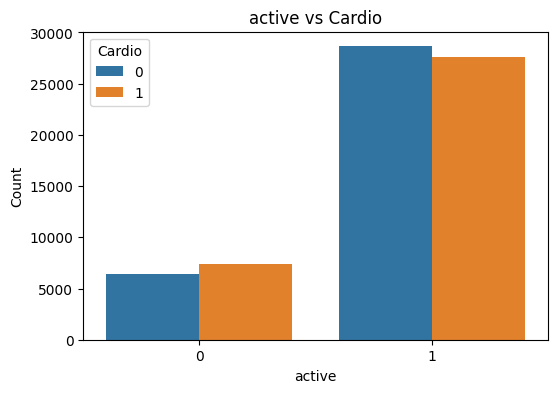

In [76]:
cat_cols = [
    'gender',
    'cholesterol',
    'gluc',
    'smoke',
    'alco',
    'active'
]
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='cardio', data=df)
    plt.title(f"{col} vs Cardio")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title="Cardio")
    plt.show()


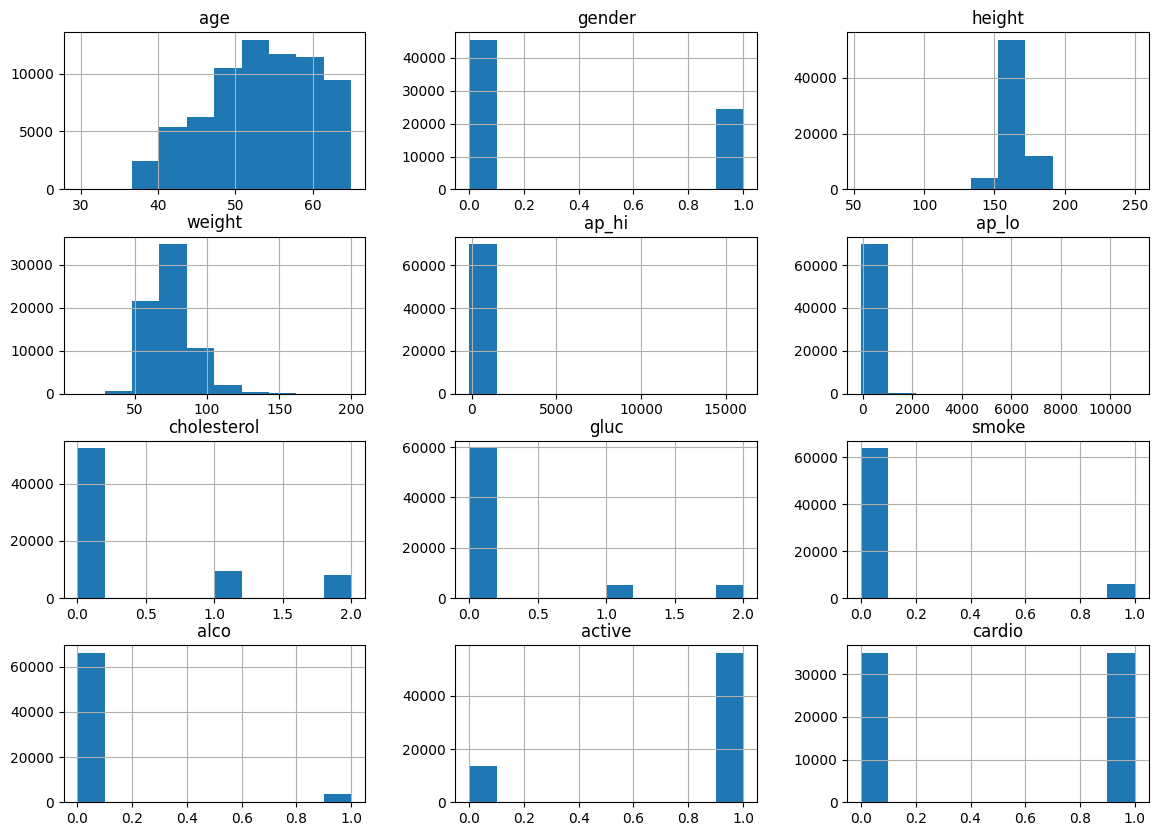

In [77]:
df.hist(figsize=(14,10))
plt.show()

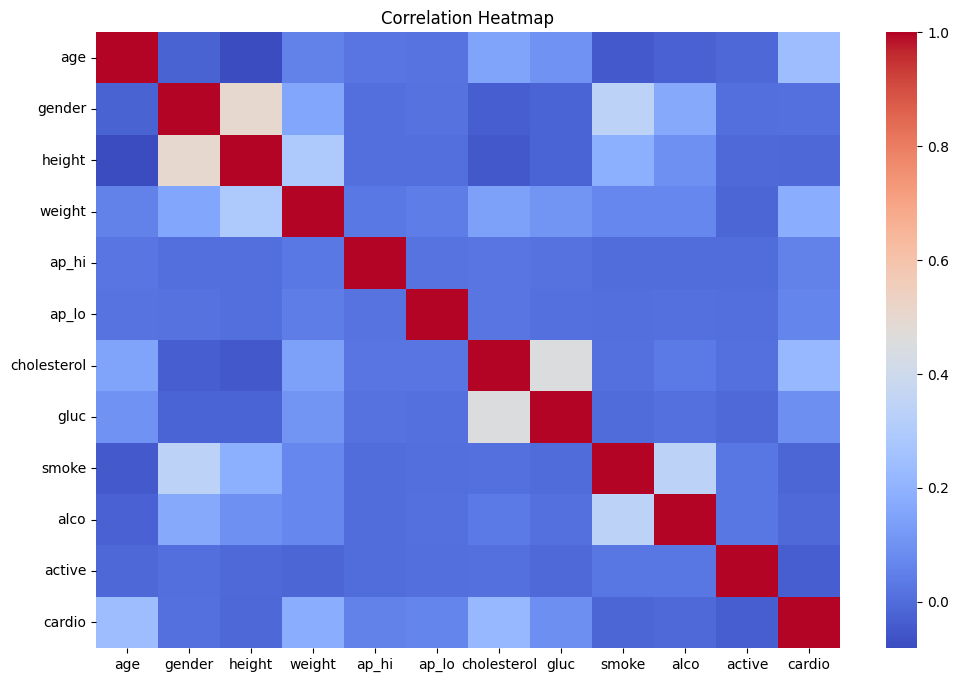

In [78]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [79]:
X = df.drop('cardio', axis=1)
y = df['cardio']

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [82]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [83]:
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)
y_pred_nn = mlp.predict(X_test_scaled)

print(classification_report(y_test, y_pred_nn))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      7004
           1       0.74      0.70      0.72      6996

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



In [84]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=500)
lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500)

In [85]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [86]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [87]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    }

In [88]:
evaluate_model(lr, X_test_scaled, y_test)

{'Accuracy': 0.7136428571428571,
 'Precision': 0.7313710302091402,
 'Recall': 0.6748141795311606,
 'F1-Score': 0.7019552449631997}

In [89]:
evaluate_model(dt, X_test, y_test)

{'Accuracy': 0.6331428571428571,
 'Precision': 0.6327054794520548,
 'Recall': 0.6337907375643225,
 'F1-Score': 0.6332476435304198}

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1'
)

grid.fit(X_train, y_train)
grid.best_params_

{'max_depth': 7, 'min_samples_split': 2}

In [92]:
from sklearn.feature_selection import RFE

In [93]:
selector = RFE(lr, n_features_to_select=8)
selector.fit(X_train_scaled, y_train)

selected_features = X.columns[selector.support_]
selected_features

Index(['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'active'],
      dtype='object')

In [94]:
X_selected = df[selected_features]
y = df['cardio']

In [95]:
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

In [96]:
scaler = StandardScaler()
X_train_fs = scaler.fit_transform(X_train_fs)
X_test_fs = scaler.transform(X_test_fs)

In [97]:
final_lr = LogisticRegression(max_iter=500)
final_lr.fit(X_train_fs, y_train_fs)

evaluate_model(final_lr, X_test_fs, y_test_fs)

{'Accuracy': 0.7130714285714286,
 'Precision': 0.7310376919497441,
 'Recall': 0.6736706689536878,
 'F1-Score': 0.7011827717027449}

In [98]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Neural Network"],
    "F1-Score": [
        evaluate_model(lr, X_test_scaled, y_test)['F1-Score'],
        evaluate_model(dt, X_test, y_test)['F1-Score'],
        f1_score(y_test, y_pred_nn)
    ]
})

results

,Model,F1-Score
0,Logistic Regression,0.701955
1,Decision Tree,0.633248
2,Neural Network,0.720171
